---
## Комментарий от наставника

Привет! Спасибо, что прислал задание:) Поздравляю с приближением к концу первого модуля. Мои комментарии, как обычно, обозначены пометкой **Комментарий от наставника**. Пострайся учесть эти комментарии.

---

# Сборный проект № 1

## Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.  

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Описание данных
- *Name* — название игры
- *Platform* — платформа
- *Year_of_Release* — год выпуска
- *Genre* — жанр игры
- *NA_sales* — продажи в Северной Америке (миллионы долларов)
- *EU_sales* — продажи в Европе (миллионы долларов)
- *JP_sales* — продажи в Японии (миллионы долларов)
- *Other_sales* — продажи в других странах (миллионы долларов)
- *Critic_Score* — оценка критиков (максимум 100)
- *User_Score* — оценка пользователей (максимум 10)
- *Rating* — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  

Данные за 2016 год могут быть неполными.

## План работы над проектом:
1. Изучить предоставленный датасет.  

2. Обработать данные. 

3. Провести исследовательский анализ данных. 

4. Составить портрет пользователя каждого региона. 

5. Проверить предложенные в проекте гипотезы. 

6. Сформулировать общий вывод.

---
## Комментарий от наставника

Хорошее вступление в работу. Можно также привести краткий план проведения самой работы. 

---

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
# Импорт нужных библиотек и классов
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
games_df = pd.read_csv('games.csv')

In [3]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games_df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


По первому шагу видим, что есть данные по продажам игр на различных платформах за разные годы. Очень много пропусков в данных, но данные по продажам и название платформы заполнены у всех.  
Предположу, что пропуски появились из-за того, что данные собирали из разнородных источников с разными данными. Также видим что данные собраны за разные годы -- возможно раньше не учитывались данные, которые актуальны сейчас.
Данные столбца User_Score надо будет привести к типу float. Также надо будет подумать что делать с Year_of_Release.

---
## Комментарий от наставника

Подумай также о возможных причинах появления пропусков, а также о том, являются ли они случайными или нет. Можно высказать предварительные варианты их обработки. 

Первый взгляд на таблицу выполнен.

---

## Шаг 2. Подготовьте данные

- **Замените названия столбцов (приведите к нижнему регистру):**

In [5]:
games_df.columns = map(str.lower, games_df.columns)
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


- **Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему:**

In [6]:
games_df['user_score'] = pd.to_numeric(games_df['user_score'], errors='coerce')

In [7]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Поменял тип в столбце user_score. Для него просто привёл значения к типу float64.

---
## Комментарий от наставника

Верно, по своей сути tbd и является Nan. 

---

- **Обработайте пропуски при необходимости:**

Причины отсутствия данных вижу в том, что скорее всего они собирались из различных источников и в каких-то источниках не было полного набора.  

В столбце user_score были значения 'tbd', но при смене типа на float64 они были заменены на NaN, что считаю правильным, т.к. никакой смысловой нагрузки значение 'tbd' не несёт.

- **Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец:**

In [8]:
games_df['total_sales'] = games_df['na_sales'] + games_df['eu_sales'] + games_df['jp_sales'] + games_df['other_sales']

---
## Комментарий от наставника

Да, лучше работать с меньшим количеством данных хорошего качества. Можно использовать индикаторные значения для заполнения пропущенных значений. Так мы просто пометим места пропусков. Главное помнить об этом и не использовать их в анализе.

---

## Шаг 3. Проведите исследовательский анализ данных

- **Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?**

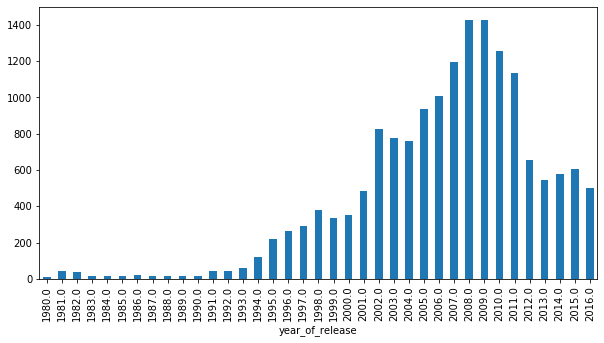

In [9]:
games_df.groupby('year_of_release')['name'].count().plot(kind='bar', figsize=(10,5))
plt.show()

Видно, что пик по играм был в 2008-2009 годах. После этого количество игр пошло на спад

---
## Комментарий от наставника

Лучше построить график по данной таблице. 

---

- **Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?**

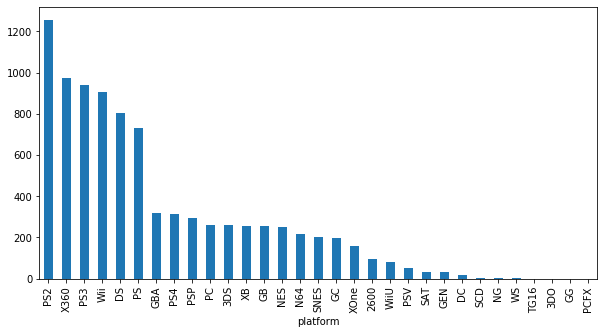

In [10]:
# Рейтинг платформ по суммарным продажам
platforms_by_sales = games_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platforms_by_sales.plot(kind='bar',figsize=(10,5))
plt.show()

---
## Комментарий от наставника

И по данной таблице также лучше привести график. 

---

In [11]:
# Найдем игры, выпущенные на платформах с суммарной выручкой более 500 млн. долл.
platforms_by_sales = platforms_by_sales.reset_index()
games_on_top_platforms = games_df[games_df['platform'].isin(platforms_by_sales[platforms_by_sales['total_sales'] > 500]['platform']) ]
games_on_top_platforms

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Mezase!! Tsuri Master DS,DS,2009.0,Sports,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [12]:
def create_hist(df_global, column_name, platform_g):
    df = df_global.query('platform == @platfrom_g')
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    plt.figure(figsize=(9,5))
    sns.distplot(df[column_name], kde=False, bins=15, hist_kws={"range":(Q1-3*IQR, Q3+3*IQR)}).set_title(platform_g)
    plt.show()
    print('Размах "усов" от', Q1-1.5*IQR, 'до', Q3+1.5*IQR)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


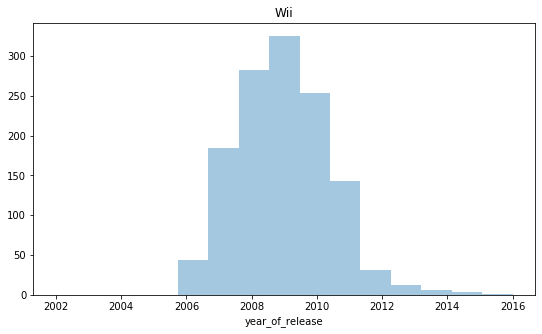

Размах "усов" от 2005.0 до 2013.0


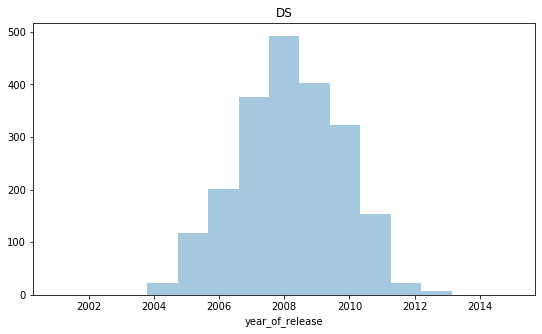

Размах "усов" от 2004.0 до 2012.0


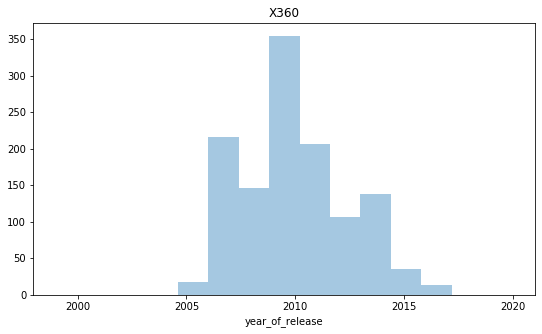

Размах "усов" от 2003.5 до 2015.5


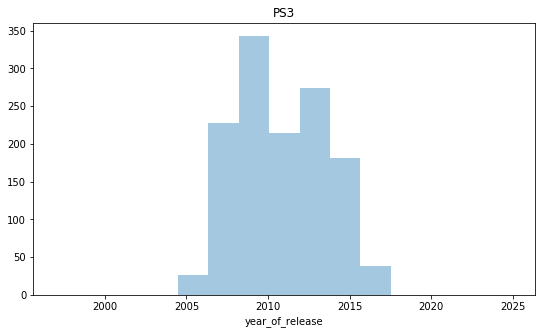

Размах "усов" от 2003.0 до 2019.0


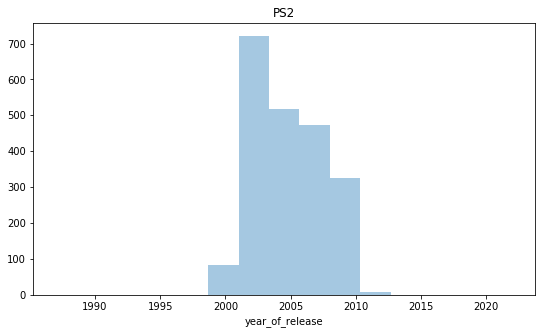

Размах "усов" от 1994.5 до 2014.5


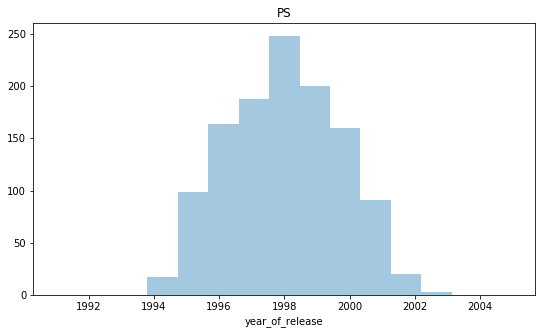

Размах "усов" от 1994.0 до 2002.0


In [13]:
for platfrom_g in games_on_top_platforms['platform'].unique():
    create_hist(games_on_top_platforms, 'year_of_release', platfrom_g)

Как видно по распределениям в среднем популярная платформа "живет" 10 лет.

---
## Комментарий от наставника

Верное значение по средней продолжительности существования платформы, можно подкрепить расчетами.

---

- **Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.**

Будем считать актуальным периодом годы с 2007 по 2016, т.к. в предудыщем пункте выяснили что в среднем платформа остается популярной 10 лет, таким образом мы отсечём данные по точно ненужным в 2017 году платформам.

---
## Комментарий от наставника

Выбран правильный актуальный год. Так в рассмотрение попадут только последние поколения платформ. 

---

In [14]:
games_df['year_of_release'] = games_df['year_of_release'].fillna(0)
games_df['year_of_release'] = games_df['year_of_release'].astype('int')
games_df = games_df.query('year_of_release >= 2007')

In [15]:
pivot_games = pd.pivot_table(games_df, values='total_sales', index=['platform'], columns=['year_of_release'], aggfunc=np.sum)

In [16]:
pivot_games['decade_sales'] = 0
for year in range(2007, 2017):
    pivot_games['decade_sales'] += pivot_games[year].fillna(0)
pivot_games.sort_values(by='decade_sales', ascending=False)

year_of_release,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,decade_sales
platform,,,,,,,,,,,
PS3,73.19,118.52,130.93,142.17,156.78,107.36,113.25,47.76,16.82,3.60,910.38
X360,95.41,135.26,120.29,170.03,143.84,99.74,88.58,34.74,11.96,1.52,901.37
Wii,152.77,171.32,206.97,127.95,59.65,21.71,8.59,3.75,1.14,0.18,754.03
DS,146.94,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN,535.54
PS4,NaN,NaN,NaN,NaN,NaN,NaN,25.99,100.00,118.90,69.25,314.14
3DS,NaN,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78,15.14,257.81
PSP,46.93,34.55,37.78,35.04,17.82,7.69,3.14,0.24,0.12,NaN,183.31
PS2,75.99,53.90,26.40,5.64,0.45,NaN,NaN,NaN,NaN,NaN,162.38
PC,9.28,12.42,16.91,24.28,35.03,23.22,12.38,13.28,8.52,5.25,160.57


По сводной таблице видим, что по продажам за десятилетие лидируют платформы PS3, X360, Wii, DS. Но по годовым продажам видно, что время этих приставок уже прошло и будущее за платформами PS4, 3DS, XOne, WiiU.

---
## Комментарий от наставника

Да, именно эти платформы мы и можем назвать перспективными на 2017 год. 

---

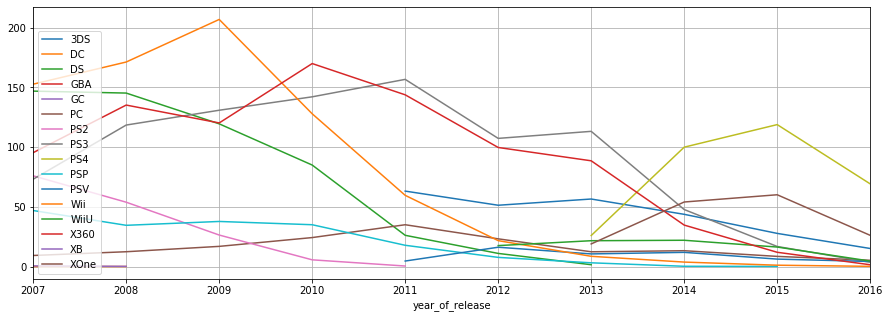

In [17]:
pivot_games.drop(columns=['decade_sales']).T.plot(figsize=(15,5), grid=True)
plt.legend(loc='lower left')
plt.show()

По графику видно, что в 2016 году продажи у всех идут на спад, но это видимо из-за того, что данные за 2016 год неполные.

- **Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.**

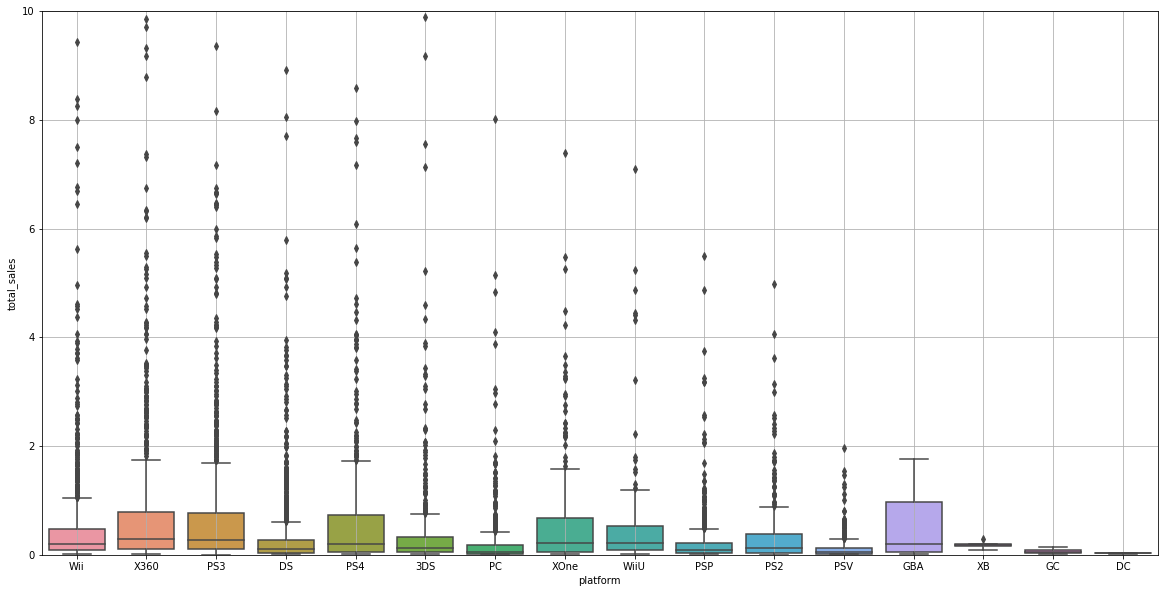

In [18]:
plt.figure(figsize=(20,10))
sns.boxplot(x='platform', y='total_sales', data = games_df)
plt.ylim(0, 10)
plt.grid()
plt.show()

По графику видим, что самые прибыльные игры на платформах X360, PS3, PS4 и XOne.
Если оценивать средние продажи, то разница невелика. В аутсайдерах: PC,PSV, DC, GC. В лидерах: X360, PS3, PS4, XOne, WiiU.

- **Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.**

In [19]:
def make_correlation_plot_and_matrix(df, xcolumn, ycolumn, title):
    plt.scatter(df[xcolumn], df[ycolumn], alpha=0.3)
    plt.xlabel(xcolumn)
    plt.ylabel(ycolumn)
    plt.title(title)
    plt.show()
    corr_matrix = df[[xcolumn, ycolumn]].corr()
    print(corr_matrix)

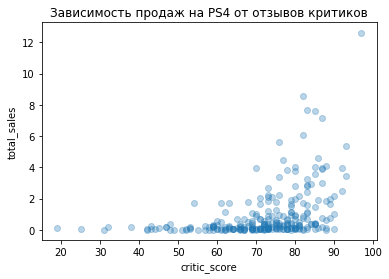

              critic_score  total_sales
critic_score      1.000000     0.406568
total_sales       0.406568     1.000000


In [20]:
games_ps4_df = games_df.query('platform == "PS4"')
make_correlation_plot_and_matrix(games_ps4_df, 'critic_score', 'total_sales', 'Зависимость продаж на PS4 от отзывов критиков')

Вывод: на примере платформы PS4 видим, что зависимость продаж от отзывов критиков маленькая.

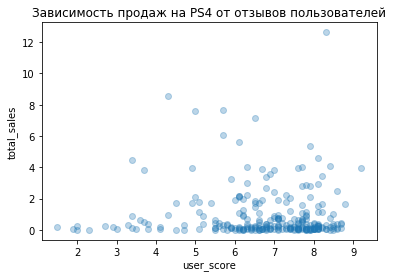

             user_score  total_sales
user_score     1.000000    -0.031957
total_sales   -0.031957     1.000000


In [21]:
make_correlation_plot_and_matrix(games_ps4_df, 'user_score', 'total_sales', 'Зависимость продаж на PS4 от отзывов пользователей')

Вывод: продажи игр на PS4 совсем не зависят от отзывов пользователей

---
## Комментарий от наставника

Результат верный. Подумай, чем он вызван.

---

- **Соотнесите выводы с продажами игр на других платформах (X360, PS3, XOne, WiiU).**

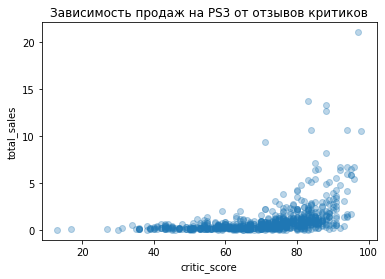

              critic_score  total_sales
critic_score       1.00000      0.43346
total_sales        0.43346      1.00000


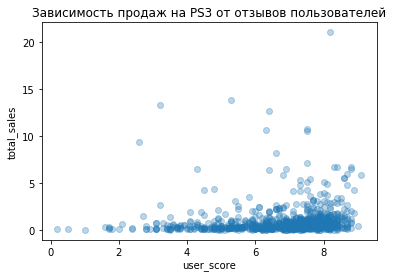

             user_score  total_sales
user_score     1.000000     0.126033
total_sales    0.126033     1.000000


In [22]:
games_ps3_df = games_df.query('platform == "PS3"')
make_correlation_plot_and_matrix(games_ps3_df, 'critic_score', 'total_sales', 'Зависимость продаж на PS3 от отзывов критиков')
make_correlation_plot_and_matrix(games_ps3_df, 'user_score', 'total_sales', 'Зависимость продаж на PS3 от отзывов пользователей')

Вывод: на платформе PS3 видим, что зависимость продаж от отзывов критиков маленькая, а от отзывов пользователей нет зависимости.

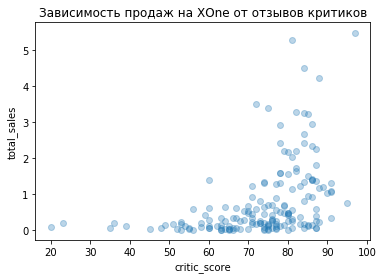

              critic_score  total_sales
critic_score      1.000000     0.416998
total_sales       0.416998     1.000000


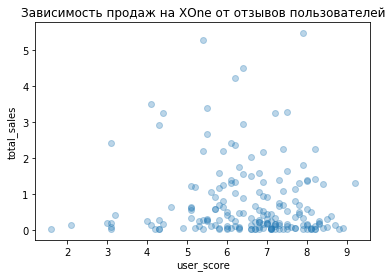

             user_score  total_sales
user_score     1.000000    -0.068925
total_sales   -0.068925     1.000000


In [23]:
games_x1_df = games_df.query('platform == "XOne"')
make_correlation_plot_and_matrix(games_x1_df, 'critic_score', 'total_sales', 'Зависимость продаж на XOne от отзывов критиков')
make_correlation_plot_and_matrix(games_x1_df, 'user_score', 'total_sales', 'Зависимость продаж на XOne от отзывов пользователей')

Вывод: на платформе XOne видим, что зависимость продаж от отзывов критиков маленькая, а от отзывов пользователей нет зависимости.

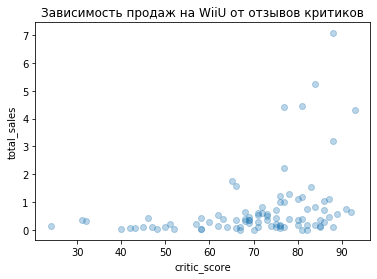

              critic_score  total_sales
critic_score       1.00000      0.34838
total_sales        0.34838      1.00000


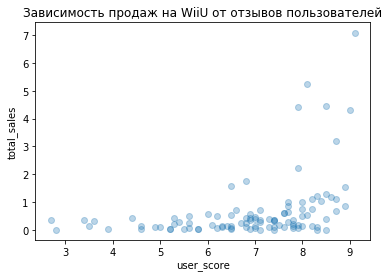

             user_score  total_sales
user_score     1.000000     0.400219
total_sales    0.400219     1.000000


In [24]:
games_wiiu_df = games_df.query('platform == "WiiU"')
make_correlation_plot_and_matrix(games_wiiu_df, 'critic_score', 'total_sales', 'Зависимость продаж на WiiU от отзывов критиков')
make_correlation_plot_and_matrix(games_wiiu_df, 'user_score', 'total_sales', 'Зависимость продаж на WiiU от отзывов пользователей')

Вывод: на платформе WiiU видим, что зависимость продаж от отзывов критиков и пользователей маленькая.

Общий вывод по популярным платформам: в большинстве случаев наблюдается небольшая зависимость продаж от оценки критиков, а от пользователей ее почти нет. Так происходит скорее всего из-за того, что пользователи покупают игры с оглядкой на отзывы критиков, а потом уже пишут свои отзывы, которые не всегда совпадают с мнением критиков.

---
## Комментарий от наставника

Популярные платформы стоит рассмотреть по-отдельности. Влияние отзывов на выручку не везде одинаково.

---

- **Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

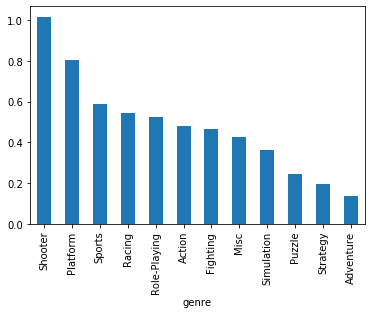

In [25]:
# Средние значения продаж игр по жанрам
games_df.groupby('genre')['total_sales'].mean().sort_values(ascending=False).plot(kind='bar')
plt.show()

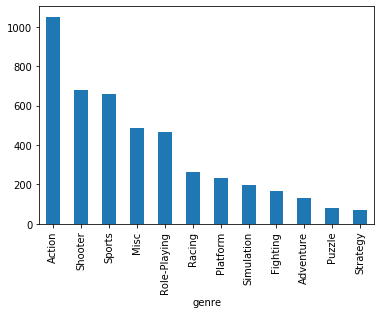

In [26]:
games_df.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.show()

Вывод: Если смотреть среднюю прибыльность игр по жанрам, то самыми прибыльными будут: Shooter, Platform, Soprts, Racing. Наоборот неприбыльными будут: Strategy и Adventure.

Если же оценивать по суммарным продажам внутри жанров, то в лидерах Action, Shooter, Sports. В аутсайдерах Puzzle и Strategy.

---
## Комментарий от наставника

Правильно, но не стоит забывать, что производство игр в жанрах Action или Shooter обходится сильно дороже, чем производство Puzzle-игр. 

Опять же лучше построить график. Визуализация - всегда хорошо. 

---

## Шаг 4. Составьте портрет пользователя каждого региона
**Определите для пользователя каждого региона (NA, EU, JP):**

- **Самые популярные платформы (топ-5). Опишите различия в долях продаж.**

In [27]:
def calc_popular_groups(df, groupby_column, value_column):
    popular_groups = (df.groupby(groupby_column)[value_column].sum() / df.groupby(groupby_column)[value_column].sum().sum()).sort_values(ascending=False).head()
    popular_groups.plot(kind='bar')
    plt.show()
    print(popular_groups)

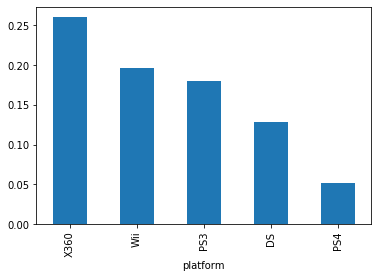

platform
X360    0.260612
Wii     0.195812
PS3     0.179469
DS      0.128960
PS4     0.051183
Name: na_sales, dtype: float64


In [28]:
calc_popular_groups(games_df, 'platform', 'na_sales')

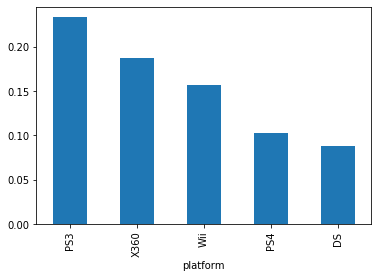

platform
PS3     0.233775
X360    0.187887
Wii     0.156932
PS4     0.103128
DS      0.087654
Name: eu_sales, dtype: float64


In [29]:
calc_popular_groups(games_df, 'platform', 'eu_sales')

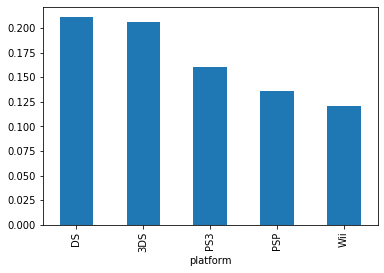

platform
DS     0.211108
3DS    0.206370
PS3    0.160654
PSP    0.135857
Wii    0.121275
Name: jp_sales, dtype: float64


In [30]:
calc_popular_groups(games_df, 'platform', 'jp_sales')

Вывод: в регионах NA и EU популярны одни и те же платформы, но с разной долей продаж. В JP же в лидерах присутствуют 3DS и PSP, которых нет в лидерах NA и EU.

- **Самые популярные жанры (топ-5). Поясните разницу.**

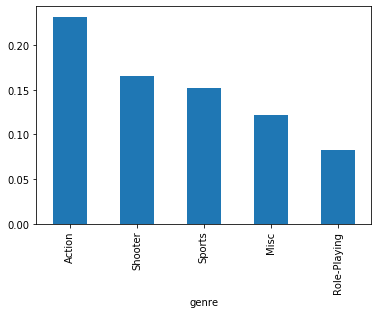

genre
Action          0.231660
Shooter         0.164793
Sports          0.152438
Misc            0.121984
Role-Playing    0.082564
Name: na_sales, dtype: float64


In [31]:
calc_popular_groups(games_df, 'genre', 'na_sales')

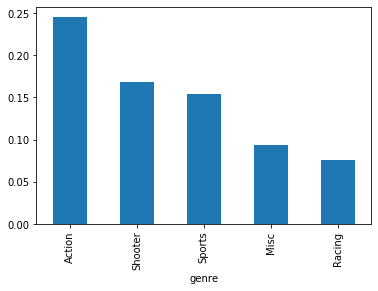

genre
Action     0.245353
Shooter    0.168232
Sports     0.154586
Misc       0.093282
Racing     0.076478
Name: eu_sales, dtype: float64


In [32]:
calc_popular_groups(games_df, 'genre', 'eu_sales')

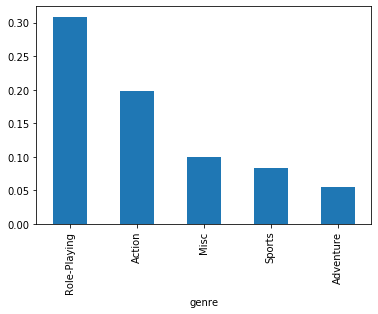

genre
Role-Playing    0.308776
Action          0.197490
Misc            0.100068
Sports          0.082614
Adventure       0.055192
Name: jp_sales, dtype: float64


In [33]:
calc_popular_groups(games_df, 'genre', 'jp_sales')

Вывод: по NA и EU популярные жанры практически идентичны (за исключением последнего жанра), в JP на первом месте стоит жанр Role-Playing, которого нет в топ-5 в EU, а в NA он на 5-ом месте по популярности.

- **Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

In [34]:
# Для начала добавим числовой столбец, который будет отвечать за рейтинг

games_df['rating'] = games_df['rating'].fillna('')

# Рейтинг переводим в число: варианты — EC, E, E10+, T, M, RP, пусто
def rating_num_foo(row):
    if row['rating'] == 'EC':
        return 1
    elif row['rating'] == 'E':
        return 2
    elif row['rating'] == 'E10+':
        return 3
    elif row['rating'] == 'T':
        return 4
    elif row['rating'] == 'M':
        return 5
    elif row['rating'] == 'RP':
        return 6
    else:
        return 0 # пусто

games_df['rating_num'] = games_df.apply(rating_num_foo, axis=1)

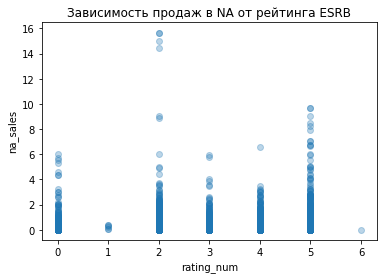

            rating_num  na_sales
rating_num    1.000000  0.189261
na_sales      0.189261  1.000000


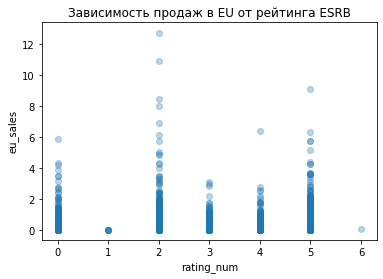

            rating_num  eu_sales
rating_num    1.000000  0.161376
eu_sales      0.161376  1.000000


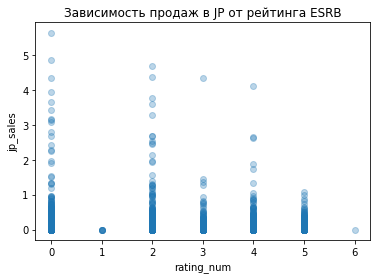

            rating_num  jp_sales
rating_num    1.000000 -0.056339
jp_sales     -0.056339  1.000000


In [35]:
make_correlation_plot_and_matrix(games_df, 'rating_num', 'na_sales', 'Зависимость продаж в NA от рейтинга ESRB')
make_correlation_plot_and_matrix(games_df, 'rating_num', 'eu_sales', 'Зависимость продаж в EU от рейтинга ESRB')
make_correlation_plot_and_matrix(games_df, 'rating_num', 'jp_sales', 'Зависимость продаж в JP от рейтинга ESRB')

Вывод: продажи не зависят от рейтинга ESRB

---
## Комментарий от наставника

Портрет типичного пользователя каждого из регионов получен. Стоит визуализировать все полученные таблицы. Здорово, что отмечены индивидуальные особенности каждого региона. 

---

## Шаг 5. Проверьте гипотезы

- **Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Воспользуемся гипотезой о равенстве средних двух генеральных совокупностей.

In [36]:
games_xone_df = games_df[(games_df['platform'] == "XOne") & (~games_df['user_score'].isnull())]
games_pc_df = games_df[(games_df['platform'] == "PC") & (~games_df['user_score'].isnull())]

In [37]:
# Найдем средний пользовательский рейтинг для двух платформ
print('Средний польз. рейтинг Xbox One:', (games_xone_df['user_score'].mean()))
print('Средний польз. рейтинг PC:', (games_pc_df['user_score'].mean()))

Средний польз. рейтинг Xbox One: 6.52142857142857
Средний польз. рейтинг PC: 6.765499124343266


Видим что средние значения почти одинаковые. Но для проверки гипотезы надо провести статистический тест.
Для его выполнения надо узнать отличаются ли дисперсии выборок.

In [38]:
# Найдем дисперсию пользовательского рейтинга по двум тарифам
print('Дисперсия польз. рейтинга Xbox One:', (games_xone_df['user_score'].var()))
print('Дисперсия польз. рейтинга PC:', (games_pc_df['user_score'].var()))

Дисперсия польз. рейтинга Xbox One: 1.9069968429360702
Дисперсия польз. рейтинга PC: 2.3403339171044952


Можно сказать что дисперсия равна - значит параметр equal_var в метод ttest_ind надо будет передавать со значением True.  
Нулевой гипотезой в нашем случае будет равенство средних пользов. рейтингов по 2 платформам.

In [39]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    games_xone_df['user_score'], 
    games_pc_df['user_score'], equal_var=True)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.05554752084307562
Не получилось отвергнуть нулевую гипотезу


Вывод: средние значения пользовательского рейтинга по платформам Xbox One и PC одинаковые.

---
## Комментарий от наставника

Гипотезы сформулированы и проверены верно.

---

- **Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные**

Также воспользуемся гипотезой о равенстве средних двух генеральных совокупностей.

In [40]:
games_action_df = games_df[(games_df['genre'] == "Action") & (~games_df['user_score'].isnull())]
games_sports_df = games_df[(games_df['genre'] == "Sports") & (~games_df['user_score'].isnull())]

In [41]:
# Найдем средний пользовательский рейтинг для двух жанров
print('Средний польз. рейтинг Action:', (games_action_df['user_score'].mean()))
print('Средний польз. рейтинг Sports:', (games_sports_df['user_score'].mean()))

Средний польз. рейтинг Action: 6.836079077429997
Средний польз. рейтинг Sports: 6.307979626485568


In [42]:
# Найдем дисперсию пользовательского рейтинга по двум жанрам
print('Дисперсия польз. рейтинга Xbox One:', (games_action_df['user_score'].var()))
print('Дисперсия польз. рейтинга PC:', (games_sports_df['user_score'].var()))

Дисперсия польз. рейтинга Xbox One: 1.8301893952255222
Дисперсия польз. рейтинга PC: 2.814034856727075


Дисперсия различается - значит параметр equal_var в метод ttest_ind надо будет передавать со значением False.
Нулевой гипотезой в нашем случае будет равенство средних пользов. рейтингов по 2 жанрам.

In [43]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    games_action_df['user_score'], 
    games_sports_df['user_score'], equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.540665510055229e-11
Отвергаем нулевую гипотезу


Вывод: средние пользовательские рейтинги для жанров Action и Sports различаются.

---
## Комментарий от наставника
Также все верно.

---

## Шаг 6. Напишите общий вывод

В ходе работы над проектом было установлено следующее:  

1) Cредняя продожительность актуальности игровой платформы составляет 10 лет. В связи с этим для прогноза прибыльности видеоигр по датасету были выбраны платформы PS4, 3DS, XOne, WiiU. Скорее всего они будут лидерами как минимум в 2017 году.

2) При оценки успешности игр нужно присматриваться к оценкам критиков и не обращать внимания на оценки пользователей. 

3) Продажи по платформам в EU и NA примерно совпадают (топ-5 X360, Wii, PS3, DS, PS4), в отличие от JP -- там свои успешные платформы (DS, 3DS, PS3, PSP, Wii)

4) Похожая ситуация обстоит с жанрами игр -- в EU и NA одни жанры в топе (Action, Shooter, Sports, Misc, Role-Playing, Racing), в JP другие (Role-Playing, Action, Misc, Sports, Adventure).

5) От рейтинга ESRB продажи также не зависят.

6) Были проверены 2 гипотезы про пользовательский рейтинг:
- средние значения пользовательского рейтинга по платформам Xbox One и PC совпадают;
- средние пользовательские рейтинги для жанров Action и Sports различаются.

---
## Комментарий от наставника

Выводы описаны кратко, но грамотно. Приведены ответы на главные вопросы проекта. В выводах можно приводить полученные ранее значения. Также можно расписать все, что было сделано в работе.  Надо отразить объем проделанной работы. 

---

## Комментарий от наставника

Если тебе нравится тема визуализации, то можешь изучить другие методы библиотеки seaborn. Она позволяет строить довольно презентабельные графики.

Ты проделал большую работу, молодец! Работа выполнена хорошо. Однако важно устранить некоторые неточности. Рассмотри влияние отзывов критиков и пользователей на выручку по популярным платформам. Также строй больше графиков в работе. Их очень не хватает в разделе с портретом типичного пользователя каждого из регионов. Визуализация - очень мощный инструмент анализа. Не стоит им пренебрегать. Думаю, ты справишься с этим быстро. Жду твою работу :)

-----